EN2550 Assignment 01

Index No.&nbsp;&nbsp;:&nbsp;190018V

Name&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;:&nbsp;Abeywickrama K.C.S.

Github &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;:&nbsp;https://github.com/KCSAbeywickrama/EN2550-Excercises/tree/master/Assignment_02

In [1]:
# imports
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

def imshowBGR(img,ax=plt):
    ax.imshow(cv.cvtColor(img,cv.COLOR_BGR2RGB))

In [166]:
import numpy as np
from scipy . optimize import minimize,curve_fit
from scipy import linalg
import matplotlib . pyplot as plt
# np . random . seed ( 0 )
N = 100
half_n = N//2
r = 10
s = r /16
t = np . random . uniform (0 , 2*np . pi , half_n )
n = s*np . random . randn ( half_n )
x , y = ( r + n)*np . cos ( t ) , ( r + n)*np . sin ( t )
X_circ = np.hstack ( (x.reshape ( half_n , 1 ) , y.reshape( half_n , 1 ) ) )
m, b = -1, 2
x = np . linspace (-12, 12 , half_n )
y = m*x + b + s*np . random . randn ( half_n )
X_line = np . hstack ( ( x . reshape ( half_n , 1 ) , y . reshape ( half_n , 1 ) ) )
X = np . vstack ( ( X_circ , X_line ) )


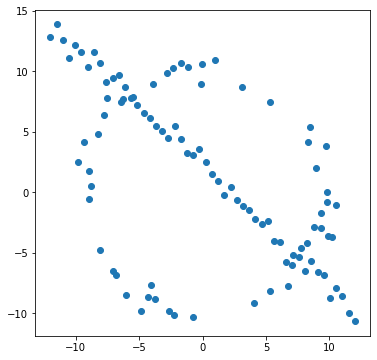

In [62]:
fig,ax=plt.subplots(1,1,figsize=(6,6))
plt.scatter(X[:,0],X[:,1])

1.Select any 3 points

2.find the circle passing through these 3 points. This is our candidate circle.

3.Use threshold distance and find all points which lie in the doughnut region. These are the inlier points.

If the count is less than threshold inlier count then skip this candidate circle and go back to the first step.
If the count exceeds threshold inlier count then move on to next step
Use all inliner points and determine new candidate circle
Find all new inliner points and new  outlier points for new candidate circle
If the count of inlier points is less than threshold inlier count then skip this new candidate circle and go back to the first step.
If the count exceeds threshold inlier count then move on to next step
Calculate the mean absolute error for the new candidate circle using the new inlier points
Add this candidate circle to the shortlist along with count of inlier points and the mean absolute error
Go back to the first step and repeat for max iterations number of times
When max iterations is completed, examine the shortlist of candidate circles and pick the circle with maximum inlier count. If more than candidate circles with same inliner count then pick the candidate circle with lesser mean absolute error

[[ 12.         -10.63288104]
 [  6.70381689  -7.75628254]
 [ -9.55102041  11.59359648]]
(31, 2)
31
62
(100, 2)


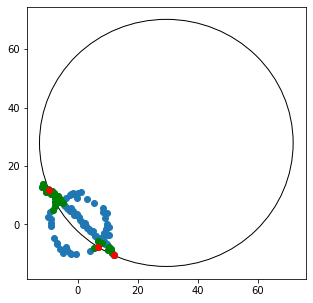

In [164]:
ittrs_limit=1
inlie_thres=22
point_indices_range=range(N)

def get_circle(points):
    (x1,y1),(x2,y2),(x3,y3)=points
   
    a = (x2-x3)**2 + (y2-y3)**2
    b = (x3-x1)**2 + (y3-y1)**2
    c = (x1-x2)**2 + (y1-y2)**2   
    h = 2*(a*b + b*c + c*a) - (a*a + b*b + c*c)

    px = (a*(b+c-a)*x1 + b*(c+a-b)*x2 + c*(a+b-c)*x3) / h
    py = (a*(b+c-a)*y1 + b*(c+a-b)*y2 + c*(a+b-c)*y3) / h 
    ar = a**0.5
    br = b**0.5
    cr = c**0.5 
    r = ar*br*cr / ((ar+br+cr)*(-ar+br+cr)*(ar-br+cr)*(ar+br-cr))**0.5

    return (px,py),r

def get_inliers(points,center,r,thres):
    tmp_diff_sqr=(X-np.array(center))**2
    r_difs=np.abs(np.sqrt(tmp_diff_sqr[:,0]+tmp_diff_sqr[:,1])-r)
    inliers=X[r_difs<thres]

def get_matches(ittrs_limit):
    for ittr in range(ittrs_limit):
        point_indices=np.random.choice(point_indices_range,3)

        print(X[point_indices])
        
        
        fig,ax=plt.subplots(1,1,figsize=(5,5))
        ax.scatter(X[:,0],X[:,1])
        
        circle=plt.Circle((px,py),r,fill=False)
        ax.add_patch(circle)

        
        
        print(inliers.shape)
        print(len(inliers))
        
        ax.scatter(inliers[:,0],inliers[:,1],color='g')
        ax.scatter(X[point_indices][:,0],X[point_indices][:,1],color='r')

  
